In [24]:
import pandas as pd
import numpy as np
import math
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
from statistics import mean
import random 
from sklearn import neighbors
from collections import Counter
import warnings

accuracy:  1.0


,CAD-CNH,label,Forcast
DATE,,,
2007/6/1,7.166745,6.969755,NaN
2007/7/1,7.213578,7.007747,NaN
2007/8/1,7.158900,6.942884,NaN
2007/9/1,7.325412,7.004895,NaN
2007/10/1,7.691101,7.219009,NaN
2007/11/1,7.672663,7.187034,NaN
2007/12/1,7.352759,7.074287,NaN
2008/1/1,7.169522,7.129494,NaN
2008/2/1,7.174444,7.108144,NaN


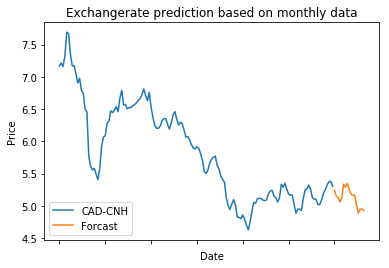

In [74]:
df=pd.read_csv('ER.csv')
df.set_index(['DATE'],inplace=True)
df.drop(columns=['EXCHUS','DATE.1','EXCAUS'],inplace=True)
forcast='CAD-CNH'
forcastout=int(math.ceil(0.1*len(j)))
df['label']=df[forcast].shift(forcastout)
X=np.array(df.drop(['label'],1))
X=X[:-forcastout] #previous data 
X=preprocessing.scale(X)
X_lat=X[-forcastout:] #forcast data
df.dropna(inplace=True)
y=np.array(df['label'])
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.1)
clf=LinearRegression()#clf=sklearn.svm.SVR(kernel='poly')#
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
forcast_set=clf.predict(X_lat)
style.use=('ggplot')
df['Forcast']=np.nan
last_date=df.iloc[-1].name
dt=datetime.datetime.strptime(last_date, '%Y/%m/%d')
last_unix=dt.timestamp()
one_day=2592000#how many seconds per day
next_unix=last_unix+one_day
for i in forcast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+[i]
df['CAD-CNH'].plot()
df['Forcast'].plot()
plt.legend(loc=3)
plt.xlabel('Date')
plt.ylabel('Price')
dt=datetime.datetime.now()
ti=dt.strftime('%Y,%B,%d,%A')
plt.title('Exchangerate prediction based on monthly data')
print('accuracy: ',accuracy)
plt.savefig('Exchangerate monthly{}.jpg'.format(ti),dpi=1600)
df.to_csv('Exchangerate monthly{}.csv'.format(ti))


,DEXCAUS,DATE.1,DEXCHUS,Final
DATE,,,,
2019/12/28,1.3073,2019/12/28,6.9954,5.35
2019/12/29,1.3073,2019/12/29,6.9954,5.35
2019/12/30,1.3073,2019/12/30,6.9954,5.37
2019/12/31,1.3073,2019/12/31,6.9954,5.38
2020/1/1,1.3073,2020/1/1,6.9954,5.36


C:\Users\ROG\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


accuracy:  0.6428505622149736


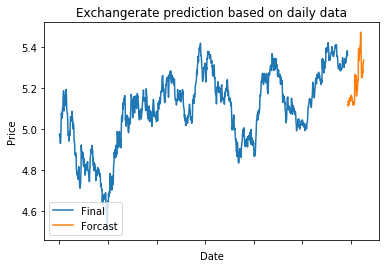

In [77]:
df=pd.read_csv('ERD1.csv')
df.set_index(['DATE'],inplace=True)
df.dropna(inplace=True)
display(df.tail())
df.drop(columns=['DEXCAUS','DATE.1','DEXCHUS'],inplace=True)
forcast='Final'
forcastout=int(math.ceil(0.4*len(j)))
df['label']=df[forcast].shift(forcastout)
X=np.array(df.drop(['label'],1))
X=X[:-forcastout] #previous data 
X=preprocessing.scale(X)
X_lat=X[-forcastout:] #forcast data
df.dropna(inplace=True)
y=np.array(df['label'])
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.4)
clf=LinearRegression()#clf=sklearn.svm.SVR(kernel='poly')#
clf.fit(X_train,y_train)
accuracy=clf.score(X_test,y_test)
forcast_set=clf.predict(X_lat)
style.use=('ggplot')
df['Forcast']=np.nan
last_date=df.iloc[-1].name
dt=datetime.datetime.strptime(last_date, '%Y/%m/%d')
last_unix=dt.timestamp()
one_day=86400#how many seconds per day
next_unix=last_unix+one_day
for i in forcast_set:
    next_date=datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+[i]
df['Final'].plot()
df['Forcast'].plot()
plt.legend(loc=3)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Exchangerate prediction based on daily data')
print('accuracy: ',accuracy)
dt=datetime.datetime.now()
ti=dt.strftime('%Y,%B,%d,%A')
plt.savefig('Exchangerate Daily{}.jpg'.format(ti),dpi=1600)
df.to_csv('ExchangerateDaily{}.csv'.format(ti))
